In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('Disease_Training.csv')

In [3]:
test = pd.read_csv('Disease_Testing.csv')

In [4]:
len(train)

4920

## 라이브러리 호출

In [5]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [6]:
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

# 한글 폰트 설정
mpl.rc('font', family = 'D2coding')
# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus = False)

#차트 스타일 설정
sns.set(font = "D2coding", rc = {"axes.unicode_minus": False}, style = 'darkgrid')
plt.rc("figure", figsize = (10,8))

warnings.filterwarnings('ignore')

## 데이터 탐색

In [7]:
train.iloc[:, -2].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [8]:
len(train.iloc[:, -2].unique())

41

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [10]:
X_train = train.iloc[:, :-2]  ## 증상(데이터)

In [11]:
y_train = train.iloc[:, -2]  ## 질병(타겟)

In [12]:
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

In [13]:
X_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [15]:
X_train['fluid_overload'].value_counts()

0    4920
Name: fluid_overload, dtype: int64

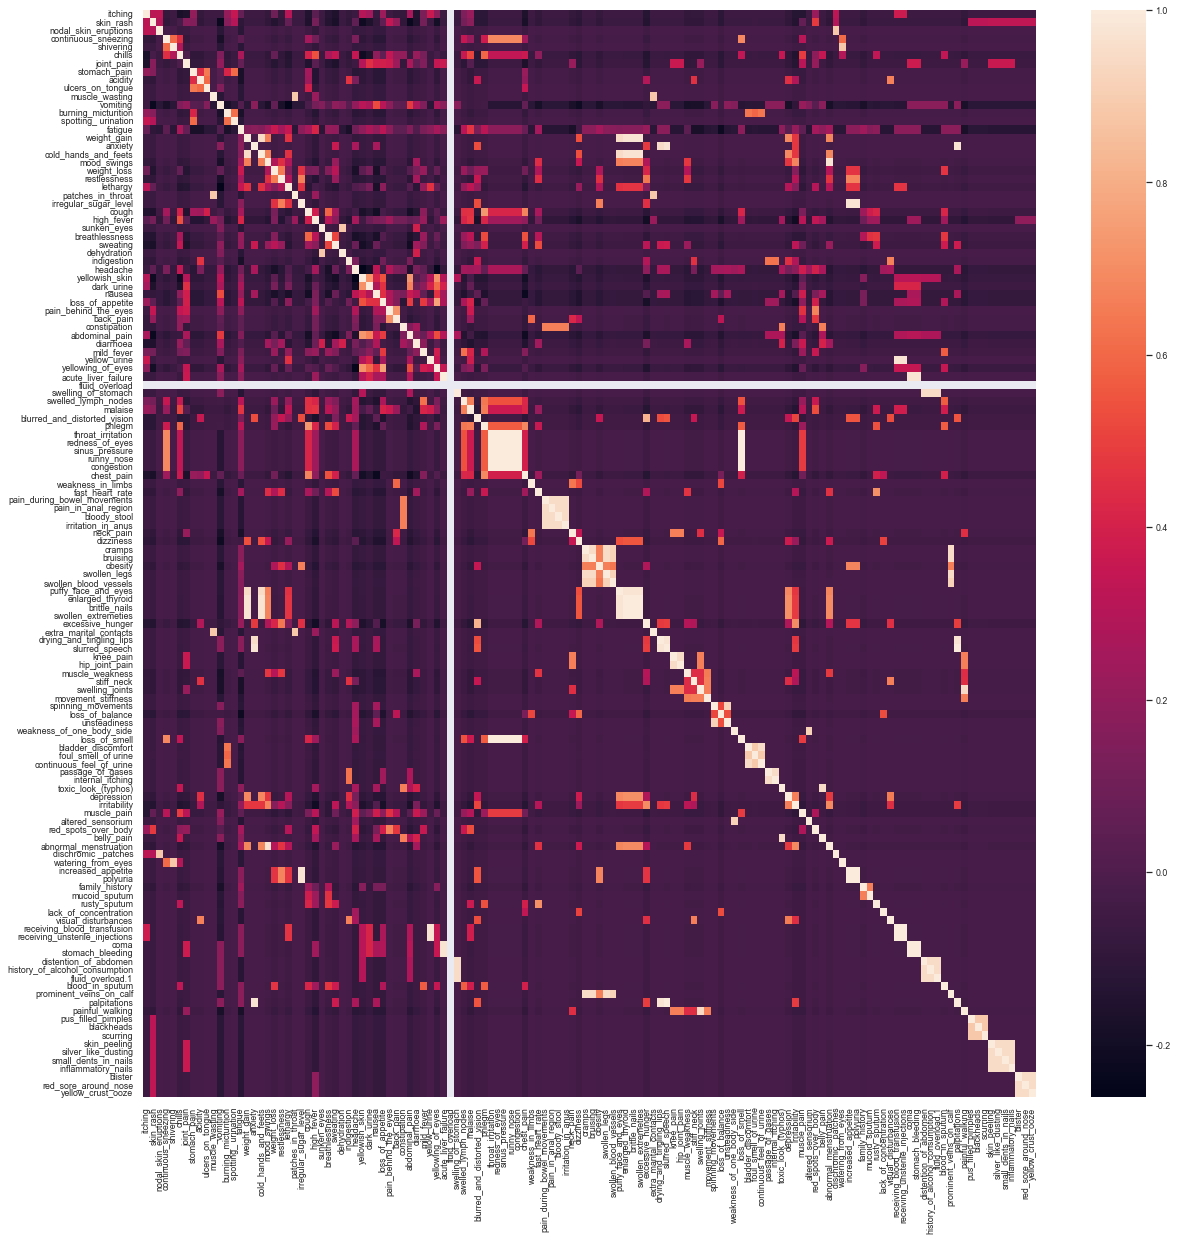

In [16]:
# 피처들의 상관계수 산출하기
corr = X_train.corr(method='pearson')
# 히트맵
plt.figure(figsize = (20, 20))
sns.set(font_scale = 0.8)
sns.heatmap(corr.values, cbar = True, fmt = '.2f', 
           xticklabels = X_train.columns,
           yticklabels = X_train.columns)
plt.show()

In [17]:
# 분산 팽창 요인(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 피처들의 vif 계수 확인
vif = pd.DataFrame()
vif['VIF factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['features'] = X_train.columns
vif.round(1)

,VIF factor,features
0,8.0,itching
1,10.9,skin_rash
2,5.3,nodal_skin_eruptions
3,9.7,continuous_sneezing
4,6.1,shivering
...,...,...
127,14.5,small_dents_in_nails
128,14.5,inflammatory_nails
129,13.0,blister
130,13.0,red_sore_around_nose


In [18]:
vif[vif.iloc[:, 0] <= 10] ## 다중공선성이 10이하인 속성만 확인

,VIF factor,features
0,7.952180,itching
2,5.271135,nodal_skin_eruptions
3,9.741282,continuous_sneezing
4,6.057486,shivering
7,7.474305,stomach_pain
8,9.153770,acidity
9,6.059818,ulcers_on_tongue
10,6.241935,muscle_wasting
12,6.698474,burning_micturition
13,5.270174,spotting_ urination


In [19]:
X_vif_feature = vif[vif.iloc[:, 0] <= 10].iloc[:, 1] 

In [20]:
X_vif = X_train.loc[:, X_vif_feature] ## 속성값을 30개로 선정한 df

In [21]:
X_vif.head()

,itching,nodal_skin_eruptions,continuous_sneezing,shivering,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,burning_micturition,spotting_ urination,...,foul_smell_of urine,altered_sensorium,dischromic _patches,watering_from_eyes,family_history,mucoid_sputum,lack_of_concentration,pus_filled_pimples,blackheads,scurring
0,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y_train.head()

0    Fungal infection
1    Fungal infection
2    Fungal infection
3    Fungal infection
4    Fungal infection
Name: prognosis, dtype: object

In [23]:
# 피처들의 vif 계수 확인
vif = pd.DataFrame()
vif['VIF factor'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['features'] = X_vif.columns
vif.round(1)

,VIF factor,features
0,1.4,itching
1,4.8,nodal_skin_eruptions
2,1.7,continuous_sneezing
3,4.9,shivering
4,6.0,stomach_pain
5,1.7,acidity
6,3.8,ulcers_on_tongue
7,6.1,muscle_wasting
8,4.5,burning_micturition
9,4.2,spotting_ urination


## 회귀분석 및 평가

In [24]:
# 성능 평가 함수
from sklearn.metrics import mean_squared_error, mean_absolute_error

# MAE, RMSE
def evaluate_rger(y, pred):
    # MAE
    mae = mean_absolute_error(y, pred)
    
    # RMSE
    rmse = np.sqrt(mean_squared_error(y, pred))
    
    print(f'MAE : {mae:.3f}, RMSE : {rmse:.3f}')

In [25]:
## X_train.to_numpy()
## np.array(X_train)

In [26]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [27]:
X_test = X_test.to_numpy()

In [28]:

y_test = y_test.to_numpy()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
# LinearRegression
lr = LinearRegression()

In [31]:
X_train

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 1, 1]], dtype=int64)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model = DecisionTreeClassifier(min_samples_split = 4, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=42)

In [34]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.9761904761904762


In [165]:
model.feature_importances_

array([0.        , 0.        , 0.02091402, 0.        , 0.        ,
       0.02372958, 0.0025    , 0.02288582, 0.00226786, 0.        ,
       0.00125   , 0.00166667, 0.        , 0.01808254, 0.00339286,
       0.        , 0.        , 0.        , 0.        , 0.02363628,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05027171, 0.00125   , 0.        , 0.        , 0.        ,
       0.00125   , 0.003625  , 0.        , 0.0220625 , 0.        ,
       0.        , 0.025     , 0.        , 0.        , 0.00125   ,
       0.02365792, 0.025     , 0.        , 0.01146366, 0.        ,
       0.        , 0.0236665 , 0.        , 0.025     , 0.        ,
       0.        , 0.        , 0.        , 0.025     , 0.        ,
       0.        , 0.02261563, 0.        , 0.025     , 0.00125   ,
       0.        , 0.02362247, 0.        , 0.00125   , 0.02330386,
       0.02368041, 0.        , 0.        , 0.        , 0.00125   ,
       0.        , 0.025     , 0.        , 0.        , 0.     

In [36]:
X_train.keys()

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [37]:
for name, value in zip(X_train.keys(), model.feature_importances_):
    print('{} : {:.3f}'.format(name, value))

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

## 그리드서치

In [38]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state = 42)  ## 모델 리셋

params = {
    'max_depth' : [2, 3, 4, 5, 6, None],
    'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

gs = GridSearchCV(model, param_grid = params, cv = 3, refit = True, n_jobs = -1) ## cv(교차검증 : 분할)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [39]:
model = gs.best_estimator_
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.9761904761904762


In [40]:
# 그리드 서치를 통해 찾은 최적의 매개변수
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
1.0


In [41]:
# 최상의 교차검증 점수
np.max(gs.cv_results_['mean_test_score'])

1.0

In [42]:
model = DecisionTreeClassifier(max_depth = None, min_samples_split = 2,min_samples_leaf = 1, random_state = 42)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

## 그리드서치와 모델의 출력된 결과가 다른이유, 작성중에 사용된 seed값이 다르게 줬기 때문입니다.

1.0
0.9761904761904762


- 트리의 최대 깊이
- default = None
→ 완벽하게 클래스 값이 결정될 때 까지 분할
또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할
- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요

# 라벨인코더(타깃)

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder()

In [45]:
le.fit(y_train)

LabelEncoder()

In [50]:
y_train.unique()

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [47]:
y_label = le.transform(y_train)

In [48]:
y_label

array([15, 15, 15, ..., 38, 35, 27])

In [49]:
y_label_test = le.transform(y_test)

# XGboost

In [ ]:
# X_train, y_train
# X_test, y_test
# y_label
# y_label_test

In [51]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [58]:
dtr = xgb.DMatrix(data = X_train, label = y_label)

In [59]:
dtest = xgb.DMatrix(data = X_test, label = y_label_test)

In [52]:
# 30개의 feature가 뭔지를 확인
for i, feature in enumerate(X_vif.keys()):
    print(f'feature{i+1} : ', feature)

feature1 :  itching
feature2 :  nodal_skin_eruptions
feature3 :  continuous_sneezing
feature4 :  shivering
feature5 :  stomach_pain
feature6 :  acidity
feature7 :  ulcers_on_tongue
feature8 :  muscle_wasting
feature9 :  burning_micturition
feature10 :  spotting_ urination
feature11 :  patches_in_throat
feature12 :  sunken_eyes
feature13 :  breathlessness
feature14 :  dehydration
feature15 :  weakness_in_limbs
feature16 :  swollen_blood_vessels
feature17 :  extra_marital_contacts
feature18 :  spinning_movements
feature19 :  unsteadiness
feature20 :  weakness_of_one_body_side
feature21 :  foul_smell_of urine
feature22 :  altered_sensorium
feature23 :  dischromic _patches
feature24 :  watering_from_eyes
feature25 :  family_history
feature26 :  mucoid_sputum
feature27 :  lack_of_concentration
feature28 :  pus_filled_pimples
feature29 :  blackheads
feature30 :  scurring


In [70]:
## multi:softmax => num_class 파라미터설정이 필요 => 타깃의 클래스 개수
## 
clf = xgb.XGBClassifier(max_depth=5, objective='multi:softmax', n_estimators=1000, 
                        num_class=41)

clf.fit(X_train, y_label)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_class=41, num_parallel_tree=1,
              objective='multi:softmax', ...)

In [71]:
xgb_model = xgb.train(params = params, dtrain = dtr, num_boost_round = num_rounds, \
                     early_stopping_rounds = 50, evals = eval_list, num_class=9)

TypeError: train() got an unexpected keyword argument 'num_class'

In [118]:
pred_val = clf.predict(X_train)

In [78]:
y_label

array([15, 15, 15, ..., 38, 35, 27])

In [119]:
pred = clf.predict(X_test)

In [60]:
params = { 'max_depth' : 3,
         'eta' : 0.05,
         'objective' : 'multi:softmax',
         'eval_metric' : 'logloss'
         }

num_rounds = 400

In [84]:
eval_list = [(dtr,'train'),(dtest, 'test')]

## 평가하기

In [86]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score  ## AUC 점수 함수

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
#     roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, \
    F1 : {3:.3f}, AUC : {4:.3f}'.format(accuracy, precision, recall, f1, roc_auc))

In [113]:
from sklearn.metrics import roc_auc_score  ## AUC 점수 함수

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
#     roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, \
    F1 : {3:.3f}, AUC : {4:.3f}'.format(accuracy, precision, recall, f1, roc_auc))
    
    print('정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, \
    F1 : {3:.3f}'.format(accuracy, precision, recall, f1))

In [114]:
get_clf_eval(y_label, pred)

오차 행렬
[[120   0   0 ...   0   0   0]
 [  0 120   0 ...   0   0   0]
 [  0   0 120 ...   0   0   0]
 ...
 [  0   0   0 ... 120   0   0]
 [  0   0   0 ...   0 120   0]
 [  0   0   0 ...   0   0 120]]


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [128]:
print(len(train))
print(len(test))

4920
42


In [121]:
confusion = confusion_matrix(y_label_test, pred)
accuracy = accuracy_score(y_label_test, pred)

In [122]:
confusion

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [123]:
accuracy

0.9761904761904762

In [129]:
pred

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27,  8])

In [133]:
y_label_test

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27, 15])

In [146]:
target = pd.DataFrame(y_label_test)
predict = pd.DataFrame(pred)

In [150]:
res = pd.concat([target, predict], axis = 1)

In [152]:
res.columns = ['target', 'pred']

In [156]:
res.loc[res['target'] != res['pred'], :]

,target,pred
41,15,8


## 훈련/검증데이터 분류 후 재검증

In [166]:
## raw
# train
# test

# X_vif : train 데이터에서 다중공선성을 고려하여 30개(<- 142개)로 컬럼을 축소

# X_train, y_train : train 데이터에서 불필요한 컬럼 삭제
# X_test, y_test : test 데이터에서 데이터/타겟 분리
# y_label : y_train 데이터(타깃)를 라벨인코딩
# y_label_test : y_test 데이터(타깃)를 라벨인코딩

In [161]:
X_sub, X_val, y_sub, y_val = train_test_split(X_train,
                                                   y_label, test_size = 0.2, random_state = 156)

In [167]:
## multi:softmax => num_class 파라미터설정이 필요 => 타깃의 클래스 개수
## 
clf = xgb.XGBClassifier(max_depth=5, objective='multi:softmax', n_estimators=1000, 
                        num_class=41)

clf.fit(X_sub, y_sub)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_class=41, num_parallel_tree=1,
              objective='multi:softmax', ...)

In [168]:
pred_valid = clf.predict(X_val)

In [171]:
len(y_val)

984

In [172]:
len(pred_valid)

984

In [174]:
confusion = confusion_matrix(y_val, pred_valid)
accuracy = accuracy_score(y_val, pred_valid)

In [175]:
confusion

array([[29,  0,  0, ...,  0,  0,  0],
       [ 0, 22,  0, ...,  0,  0,  0],
       [ 0,  0, 28, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 18,  0,  0],
       [ 0,  0,  0, ...,  0, 21,  0],
       [ 0,  0,  0, ...,  0,  0, 26]], dtype=int64)

In [176]:
accuracy

1.0

In [180]:
# https://m.blog.naver.com/fbfbf1/222455762411(다중분류 - 평가지표 개념설명)
precision = precision_score(y_val, pred_valid, average = "macro")
precision

1.0

In [ ]:
confusion = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)